This notebook will look at the variation in audio and video file duration to try and get the correspondence between them . 

In [9]:
import soundfile as sf
import glob 
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

In [28]:
# get all file durations 
audio_folder = 'E://fieldwork_2018_002//actrackdata//wav//2018-07-28_001//'
audio_files = glob.glob(audio_folder+'*.WAV')
file_durations = []
rec_names = []
for each in audio_files:
    rec_name = os.path.split(each)[-1][:-4]
    file_durations.append(sf.info(each).duration)
    rec_names.append(rec_name)

In [33]:
rec_durations = pd.DataFrame(data=rec_names, columns=['filename'])
rec_durations['duration_s'] = file_durations

For now, I'm manually entering the frame numbers on K1/P000/

In [36]:
fps = 25
k1_p0_videoframes = [337,380,377,376,376,376,376,376,377,376,376,376,377,376,377,376,377,375,376,375,376]
k1_p0_durns = np.array(k1_p0_videoframes)/25

<IPython.core.display.Javascript object>


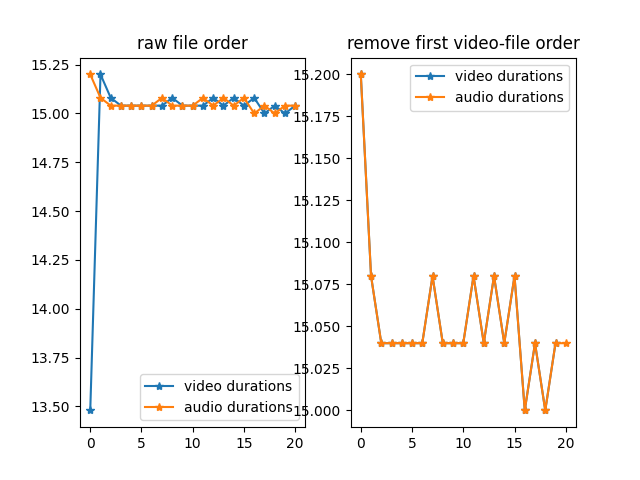

In [46]:
plt.figure()
plt.subplot(121)
plt.title('raw file order')
plt.plot(k1_p0_durns,'-*', label='video durations')
plt.plot(rec_durations['duration_s'][:k1_p0_durns.size],'-*', label='audio durations')
plt.legend()
plt.subplot(122)
plt.title('remove first video-file order')
plt.plot(k1_p0_durns[1:],'-*', label='video durations')
plt.plot(rec_durations['duration_s'][:k1_p0_durns.size],'-*', label='audio durations')
plt.legend()

To be double sure, let's also do the same for the last few video files. 

In [47]:
lastfiles_frames = [376,377,376,377,376,377,376,377,376,377,376]
lastfiles_durations = np.array(lastfiles_frames)/fps

<IPython.core.display.Javascript object>


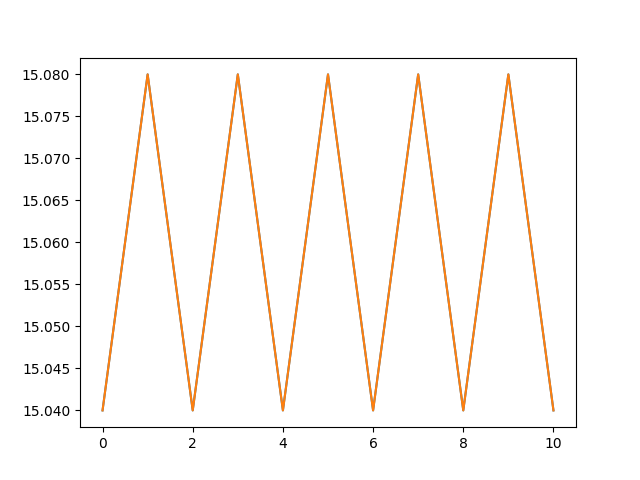

In [52]:
plt.figure()
plt.plot(lastfiles_durations)
plt.plot(rec_durations['duration_s'][-lastfiles_durations.size:].tolist())